In [127]:
import os
import re
import cv2 # opencv library
import numpy as np
from os.path import isfile, join
import matplotlib.pyplot as plt

In [128]:
#converting video into frames
input = cv2.VideoCapture('/content/Input.mp4')
 
frame_number = 0

In [129]:
while (True):
 
    success, frame = input.read()
    #saving frames in folder
    if success:
        cv2.imwrite(f'/content/frames/frame_{frame_number}.jpg', frame)
 
    else:
        break
 
    frame_number = frame_number+1
 
input.release()

In [120]:
vert_fr = os.listdir('/content/frames/')

# sort file names
vert_fr.sort(key=lambda f: int(re.sub('\D', '', f)))

# empty list to store the frames
vert_img=[]
for i in vert_fr:
    # read the frames
    img = cv2.imread('frames/'+i)
    # append the frames to the list
    vert_img.append(img)

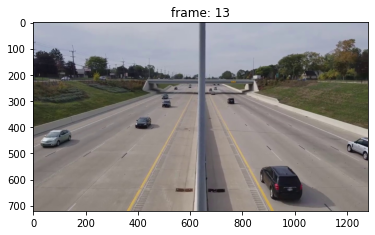

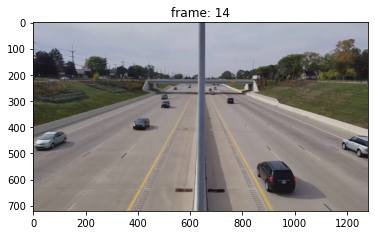

In [121]:
i = 13

for frame in [i, i+1]:
    plt.imshow(cv2.cvtColor(vert_img[frame], cv2.COLOR_BGR2RGB))
    plt.title("frame: "+str(frame))
    plt.show()

In [122]:
# kernel for image dilation
kernel = np.ones((4,4),np.uint8)

# font style
#font = cv2.FONT_HERSHEY_SIMPLEX

# directory to save the ouput frames
path_In = "/content/output1/"

for i in range(len(vert_img)-1):
    
    # frame differencing
    frame_A = cv2.cvtColor(vert_img[i], cv2.COLOR_BGR2GRAY)
    frame_B = cv2.cvtColor(vert_img[i+1], cv2.COLOR_BGR2GRAY)
    diff_img = cv2.absdiff(frame_B, frame_A)
    
    # image thresholding
    ret, thresh = cv2.threshold(diff_img, 30, 255, cv2.THRESH_BINARY)
    
    # image dilation
    dilated = cv2.dilate(thresh,kernel,iterations = 1)
    
    # find contours
    contours, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    
    # shortlist contours appearing in the detection zone
    valid_cntrs = []
    for cntr in contours:
        x,y,w,h = cv2.boundingRect(cntr)
        if (cv2.contourArea(cntr) >= 100):
            valid_cntrs.append(cntr)
            
    # add contours to original frames
    dmy = vert_img[i].copy()
    cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
    
    #cv2.putText(dmy, "vehicles detected: " + str(len(valid_cntrs)), (55, 15), font, 0.6, (0, 180, 0), 2)
    cv2.line(dmy, (0, 1200),(1200,1200),(100, 255, 255))
    cv2.imwrite(path_In+str(i)+'.png',dmy)  

In [130]:
# specify video name
path_Out = 'detection.mp4'

# specify frames per second
fps = 14.0

In [131]:
frame_array = []
files = [f for f in os.listdir(path_In) if isfile(join(path_In, f))]

In [132]:
files.sort(key=lambda f: int(re.sub('\D', '', f)))

for i in range(len(files)):
    filename=path_In + files[i]
    
    #read frames
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_array.append(img)


In [133]:
out = cv2.VideoWriter(path_Out,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])

out.release()